In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils import data as D
from torch import nn
from d2l import torch as d2l

torch.set_default_tensor_type(torch.DoubleTensor)

In [340]:
data = np.array(pd.read_excel('data_flatten.xlsx', header=None).values.flatten(), dtype=np.float64)
data

array([ 11.,   5.,   4.,   7.,  16.,   6.,   5.,   7.,  13.,   6.,   5.,
         7.,  12.,   5.,   4.,   6.,   9.,   5.,   5.,  11.,  29.,  21.,
        17.,  20.,  27.,  13.,   9.,  10.,  16.,   6.,   5.,   7.,  11.,
         5.,   5.,   6.,  12.,   7.,   7.,  10.,  15.,  10.,   9.,  11.,
        15.,  10.,  10.,  16.,  26.,  21.,  23.,  36.,  50.,  45.,  45.,
        49.,  57.,  43.,  40.,  44.,  52.,  43.,  42.,  45.,  52.,  41.,
        39.,  41.,  48.,  35.,  34.,  35.,  42.,  34.,  36.,  43.,  55.,
        48.,  54.,  65.,  80.,  70.,  74.,  85., 101.,  89.,  88.,  90.,
       100.,  87.,  88.,  89., 104.,  89.,  89.,  90., 106.,  96.,  94.,
        99., 109.,  99.,  96., 102.])

将数据集均分为5份

In [341]:
data1 = np.array(list(enumerate(data)))
np.random.shuffle(data1)
L = round(len(data1) / 5)
datasets = [data1[i*L:(i+1)*L] for i in range(5) if i != 4]
datasets.append(data1[4*L:])
datasets

[array([[ 16.,   9.],
        [ 66.,  39.],
        [100., 109.],
        [ 61.,  43.],
        [ 76.,  55.],
        [ 85.,  89.],
        [ 29.,   6.],
        [ 86.,  88.],
        [ 38.,   7.],
        [ 93.,  89.],
        [  0.,  11.],
        [ 68.,  48.],
        [ 39.,  10.],
        [ 46.,  10.],
        [ 28.,  16.],
        [ 75.,  43.],
        [ 97.,  96.],
        [ 89.,  87.],
        [ 72.,  42.],
        [ 77.,  48.],
        [ 64.,  52.]]),
 array([[ 99.,  99.],
        [ 81.,  70.],
        [102.,  96.],
        [ 49.,  21.],
        [ 23.,  20.],
        [ 47.,  16.],
        [ 33.,   5.],
        [101.,  99.],
        [ 57.,  43.],
        [  3.,   7.],
        [  8.,  13.],
        [ 60.,  52.],
        [ 40.,  15.],
        [ 35.,   6.],
        [ 70.,  34.],
        [ 44.,  15.],
        [ 83.,  85.],
        [ 37.,   7.],
        [ 31.,   7.],
        [  1.,   5.],
        [ 73.,  34.]]),
 array([[ 55.,  49.],
        [ 96., 106.],
        [ 34.,   5.],
      

In [342]:
np.concatenate(datasets[0:4])[0]

array([16.,  9.])

In [343]:
batch_size = 10

class MyData(D.Dataset):
    def __init__(self, i: int, train=True):
        """
        i 表示拿第几个做验证集
        """
        if train:
            self.data = np.concatenate([datasets[j] for j in range(5) if j != i])
        else:
            self.data = datasets[i]

    def __getitem__(self, idx):
        assert idx < len(self.data)
        return tuple(np.array(self.data[idx], dtype=np.float64))

    def __len__(self):
        
        return len(self.data)

In [344]:
dataset = MyData(4)
train_iter = D.DataLoader(dataset, batch_size=20)

test_dataset = torch.from_numpy(datasets[4].T)

In [345]:
test_dataset

tensor([[ 24.,  25.,   4.,  30.,  84.,  69.,  10.,  58.,  94., 103.,  59.,  65.,
          74.,  36.,  21.,  71.,  17.,  98.,  42.,  54.],
        [ 27.,  13.,  16.,   5., 101.,  35.,   5.,  40.,  89., 102.,  44.,  41.,
          36.,  12.,  21.,  35.,   5.,  94.,   9.,  45.]])

In [346]:
for x, y in train_iter:
    break
x

tensor([ 16.,  66., 100.,  61.,  76.,  85.,  29.,  86.,  38.,  93.,   0.,  68.,
         39.,  46.,  28.,  75.,  97.,  89.,  72.,  77.])

神经网络传入一维向量会报错

In [431]:
net = nn.Sequential(
    nn.Linear(1, 2), nn.Sigmoid(),
    nn.Linear(2, 2), nn.Sigmoid(),
    nn.Linear(2, 1)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=1)
        m.bias.data.fill_(0)

net.apply(init_weights)

net.load_state_dict(torch.load('mlp2.params'))

loss = nn.MSELoss()

In [430]:
num_epochs = 10000
optimizer = torch.optim.Adagrad(net.parameters(), lr=0.1)
for epoch in range(num_epochs):
    for x, y in train_iter:
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        # net(x) can generate the prediction of x.
        l = loss(net(x), y)
        optimizer.zero_grad()
        l.backward()
        # .step() will automatically update the parameters.
        optimizer.step()
    l_ = loss(net(test_dataset[0].reshape(-1, 1)), test_dataset[1].reshape(-1, 1))
    print(f'epoch {epoch + 1}, loss {l_:f}')

epoch 1, loss 2453.517209
epoch 2, loss 2425.637903
epoch 3, loss 2402.357606
epoch 4, loss 2381.843734
epoch 5, loss 2363.942449
epoch 6, loss 2347.996502
epoch 7, loss 2333.586190
epoch 8, loss 2320.404131
epoch 9, loss 2308.224209
epoch 10, loss 2296.877257
epoch 11, loss 2286.234146
epoch 12, loss 2276.194330
epoch 13, loss 2266.678076
epoch 14, loss 2257.621105
epoch 15, loss 2248.970824
epoch 16, loss 2240.683639
epoch 17, loss 2232.722989
epoch 18, loss 2225.057887
epoch 19, loss 2217.661829
epoch 20, loss 2210.511948
epoch 21, loss 2203.588369
epoch 22, loss 2196.873692
epoch 23, loss 2190.352593
epoch 24, loss 2184.011496
epoch 25, loss 2177.838311
epoch 26, loss 2171.822216
epoch 27, loss 2165.953486
epoch 28, loss 2160.223339
epoch 29, loss 2154.623822
epoch 30, loss 2149.147698
epoch 31, loss 2143.788366
epoch 32, loss 2138.539786
epoch 33, loss 2133.396410
epoch 34, loss 2128.353135
epoch 35, loss 2123.405249
epoch 36, loss 2118.548397
epoch 37, loss 2113.778537
epoch 38, 

In [349]:
net(torch.tensor([50.]))

tensor([34.8075], grad_fn=<AddBackward0>)

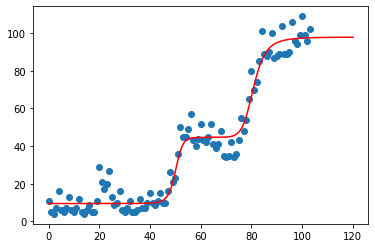

In [433]:
plt.scatter(np.arange(104), data)
x = np.linspace(0, 120, 1000)
plt.plot(x, net(torch.from_numpy(x).reshape(-1, 1)).detach().numpy(), color='r')

In [454]:
data_hat = net(torch.from_numpy(np.arange(104, dtype=np.float64)).reshape(-1, 1)).detach().numpy()
data_hat = np.array(data_hat).reshape(104)

array([ 9.50681163,  9.50683542,  9.50686333,  9.50689608,  9.50693453,
        9.5069797 ,  9.50703277,  9.50709516,  9.50716855,  9.50725491,
        9.50735661,  9.50747644,  9.50761771,  9.50778439,  9.50798119,
        9.50821376,  9.50848885,  9.5088146 ,  9.50920079,  9.50965927,
        9.51020443,  9.51085383,  9.51162899,  9.51255649,  9.51366935,
        9.51500893,  9.51662745,  9.5185915 ,  9.52098692,  9.52392568,
        9.52755575,  9.53207546,  9.53775481,  9.54496766,  9.55424111,
        9.56633308,  9.5823564 ,  9.60398192,  9.63377839,  9.67579405,
        9.73657453,  9.82698172,  9.9655009 , 10.18431683, 10.54043893,
       11.1354323 , 12.14718802, 13.86819763, 16.70630851, 21.01970391,
       26.66503723, 32.62808185, 37.5707905 , 40.86948578, 42.75224278,
       43.73041545, 44.21523369, 44.45156347, 44.56704024, 44.62430124,
       44.65338534, 44.6686802 , 44.67718927, 44.6824708 , 44.68654117,
       44.69087509, 44.69707664, 44.70756754, 44.72659654, 44.76

In [455]:
data.reshape(104)

array([ 11.,   5.,   4.,   7.,  16.,   6.,   5.,   7.,  13.,   6.,   5.,
         7.,  12.,   5.,   4.,   6.,   9.,   5.,   5.,  11.,  29.,  21.,
        17.,  20.,  27.,  13.,   9.,  10.,  16.,   6.,   5.,   7.,  11.,
         5.,   5.,   6.,  12.,   7.,   7.,  10.,  15.,  10.,   9.,  11.,
        15.,  10.,  10.,  16.,  26.,  21.,  23.,  36.,  50.,  45.,  45.,
        49.,  57.,  43.,  40.,  44.,  52.,  43.,  42.,  45.,  52.,  41.,
        39.,  41.,  48.,  35.,  34.,  35.,  42.,  34.,  36.,  43.,  55.,
        48.,  54.,  65.,  80.,  70.,  74.,  85., 101.,  89.,  88.,  90.,
       100.,  87.,  88.,  89., 104.,  89.,  89.,  90., 106.,  96.,  94.,
        99., 109.,  99.,  96., 102.])

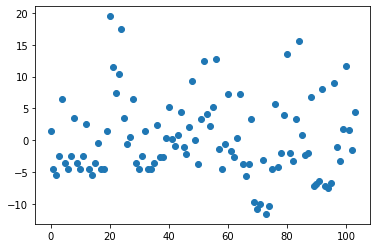

In [463]:
res = data - data_hat
plt.scatter(np.arange(104), res)

In [462]:
prediction = net(torch.arange(104, 112).double().reshape(-1, 1)).detach().numpy()
prediction

array([[97.61370614],
       [97.65085129],
       [97.6827472 ],
       [97.71021707],
       [97.73393758],
       [97.75446855],
       [97.77227584],
       [97.78774927]])

In [389]:
# torch.save(net.state_dict(), 'mlp2.params')